# ![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 5

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in the round 2.

### Explore the data

Done in the round 3.

### Processing Data

(_Further processing..._)

- X-y split.
- Normalize (numerical).


In [37]:
import numpy as np
import pandas as pd

In [38]:
cfile = pd.read_csv('marketing_customer_analysis.csv')

In [39]:
cfile.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [40]:
cfile.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
x = cfile.drop(['Total Claim Amount'], axis = 1)

In [43]:
y = cfile['Total Claim Amount']

In [44]:
numerical = pd.DataFrame(cfile.select_dtypes(np.number))
categorical = pd.DataFrame(cfile.select_dtypes(object))

In [45]:
transformer = MinMaxScaler().fit(numerical)
x_normalized = transformer.transform(numerical)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns = numerical.columns)

(9134, 8)


In [46]:
cfile.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [47]:
data_corr = pd.DataFrame(x_normalized, columns=numerical.columns).corr() 

In [48]:
data_corr

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


# Round 6 


# ![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 6

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in the round 2.

### Explore the data

Done in the round 3.

### Processing Data

(_Further processing..._)

- X-y split. (_done_)
- Normalize (numerical). (_done_)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

### Linear Regression

- Train-test split.
- Apply linear regression.

### Model Validation

- Description:
  - R2.
  - MSE.
  - RMSE.
  - MAE.


In [49]:
from sklearn.preprocessing import OneHotEncoder
# making a mold for the onehot-function 
encoder = OneHotEncoder().fit(categorical)

In [50]:
categorical


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [51]:
# dropping these columns: customer, effective to date, response
try:
    categorical = categorical.drop(columns=["Response","Customer", "Effective To Date"], axis = 1)
    print("deleted columns 'response', 'customer', 'effective to date'")
except:
    print("columns 'response', 'customer', 'effective to date' are already deleted.")

deleted columns 'response', 'customer', 'effective to date'


In [52]:
categorical

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [53]:
# making the mold by using categorical data as the default data
encoder = OneHotEncoder().fit(categorical)
# putting the mold to work for the categorical data (?), then make an array out of it
cat_encoded = encoder.transform(categorical).toarray()
# getting the column names
cols = encoder.get_feature_names_out(input_features=categorical.columns)
# turning it into dataframe
onehot_encoded = pd.DataFrame(cat_encoded,columns=cols)
onehot_encoded.head(10)

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
X = pd.concat([x_normalized, onehot_encoded], axis=1)
X.head(1)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.0,0.132974,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [55]:
onehot_encoded_X = pd.DataFrame(cat_encoded,columns=cols)
onehot_encoded_X.head(10)

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
# combining again our numerical and categorical
X = pd.concat([x_normalized, onehot_encoded], axis=1)
X.columns


Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'State_Arizona', 'State_California', 'State_Nevada', 'State_Oregon',
       'State_Washington', 'Coverage_Basic', 'Coverage_Extended',
       'Coverage_Premium', 'Education_Bachelor', 'Education_College',
       'Education_Doctor', 'Education_High School or Below',
       'Education_Master', 'EmploymentStatus_Disabled',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed', 'Gender_F',
       'Gender_M', 'Location Code_Rural', 'Location Code_Suburban',
       'Location Code_Urban', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Policy Type_Corporate Auto', 'Policy Type_Personal Auto',
       'Policy Type_Special Auto', 'Policy_Corporate L1',
 

In [57]:
#Now lets separating y and X to train and test the machine. 
y1 = X["Total Claim Amount"]
X1 = X.drop(["Total Claim Amount"], axis = 1)

In [58]:
transformer = MinMaxScaler().fit(numerical)
x_normalized = transformer.transform(numerical)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns=numerical.columns)

(9134, 8)


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time
import sys

train_list1 = []
r2_list1 = []
mse_list1 = []
rmse_list1 = []
mae_list1 = []
testsize1 = []
bigger1 = []

# calculating for different test_size values
for i in range(1,10,1):

    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=i/10, random_state=42)
    testsize1.append(i/10)

    # preparing linear model function and make a mold from the training + test data
    from sklearn import linear_model
    lm = linear_model.LinearRegression()
    lm.fit(X_train1,y_train1)

    # calculating R2 from training data
    predictions1 = lm.predict(X_train1)
    r2_train1 = r2_score(y_train1, predictions1)
    train_list1.append(r2_train1)

    # calculating R2 from test data
    predictions_test1 = lm.predict(X_test1)
    r2_1 = r2_score(y_test1, predictions_test1)
    r2_list1.append(r2_1)

    # calculating mean squared error (MSE)
    from sklearn.metrics import mean_squared_error
    mse1=mean_squared_error(y_test1,predictions_test1)
    mse_list1.append(mse1)

    # calculating root mean squared error (RMSE)
    rmse1 = np.sqrt(mean_squared_error(y_test1,predictions_test1))
    rmse_list1.append(rmse1)

    # calculating MAE 
    from sklearn.metrics import mean_absolute_error
    mae1 = mean_absolute_error(y_test1, predictions_test1)
    mae_list1.append(mae1)

    # bigger or smaller
    if r2_train1 < r2_1:
        bigger = "train < test"
    elif r2_train1 > r2_1:
        bigger = "train > test"
    else:
        bigger = "train = test"
    bigger1.append(bigger)


print("\n\nComparison of the R2_train and R2_test for different test sizes.")
compare1 = pd.DataFrame()
compare1["test_size"] = pd.DataFrame(testsize1)
compare1["r2_train"] = pd.DataFrame(train_list1)
compare1["r2_test"] = pd.DataFrame(r2_list1)
compare1["comparison"] = pd.DataFrame(bigger1)
display(compare1)

# displaying the metrics 
time.sleep(1)
print("results")
metrics1 = pd.DataFrame()
metrics1["test_size"] = pd.DataFrame(testsize1)
metrics1["MSE"] = pd.DataFrame(mse_list1)
metrics1["RMSE"] = pd.DataFrame(rmse_list1)
metrics1["MAE"] = pd.DataFrame(mae_list1)
display(metrics1)
print("MSE: mean squared error\nMSE: root mean squared error\nMAE: mean absolute error")



Comparison of the R2_train and R2_test for different test sizes.


,test_size,r2_train,r2_test,comparison
0,0.1,0.773857,0.750578,train > test
1,0.2,0.773571,0.762367,train > test
2,0.3,0.773581,0.764204,train > test
3,0.4,0.773188,0.766227,train > test
4,0.5,0.770634,0.768951,train > test
5,0.6,0.772964,0.766335,train > test
6,0.7,0.775786,0.763233,train > test
7,0.8,0.781706,0.763101,train > test
8,0.9,0.792008,0.750322,train > test


results


,test_size,MSE,RMSE,MAE
0,0.1,0.002397,0.048957,0.033515
1,0.2,0.002257,0.047511,0.032764
2,0.3,0.002300,0.047955,0.032831
3,0.4,0.002274,0.047688,0.032979
4,0.5,0.002271,0.047651,0.033248
5,0.6,0.002340,0.048369,0.033305
6,0.7,0.002359,0.048568,0.033452
7,0.8,0.002394,0.048930,0.033537
8,0.9,0.002493,0.049927,0.034968


MSE: mean squared error
MSE: root mean squared error
MAE: mean absolute error


# ![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 7

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in rounds 2 to 7.

**Bonus**: Build a function, from round 2 and round 7, to clean and process the data.

### Explore the data

Done in the round 3.

### Modeling

Description:

- Try to improve the linear regression model.


In [60]:
# using StandardScaler instead of MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [61]:
# defining numerical and categorical for the 2nd attempt
numerical2 = pd.DataFrame(cfile.select_dtypes(np.number))
categorical2 = pd.DataFrame(cfile.select_dtypes(object))

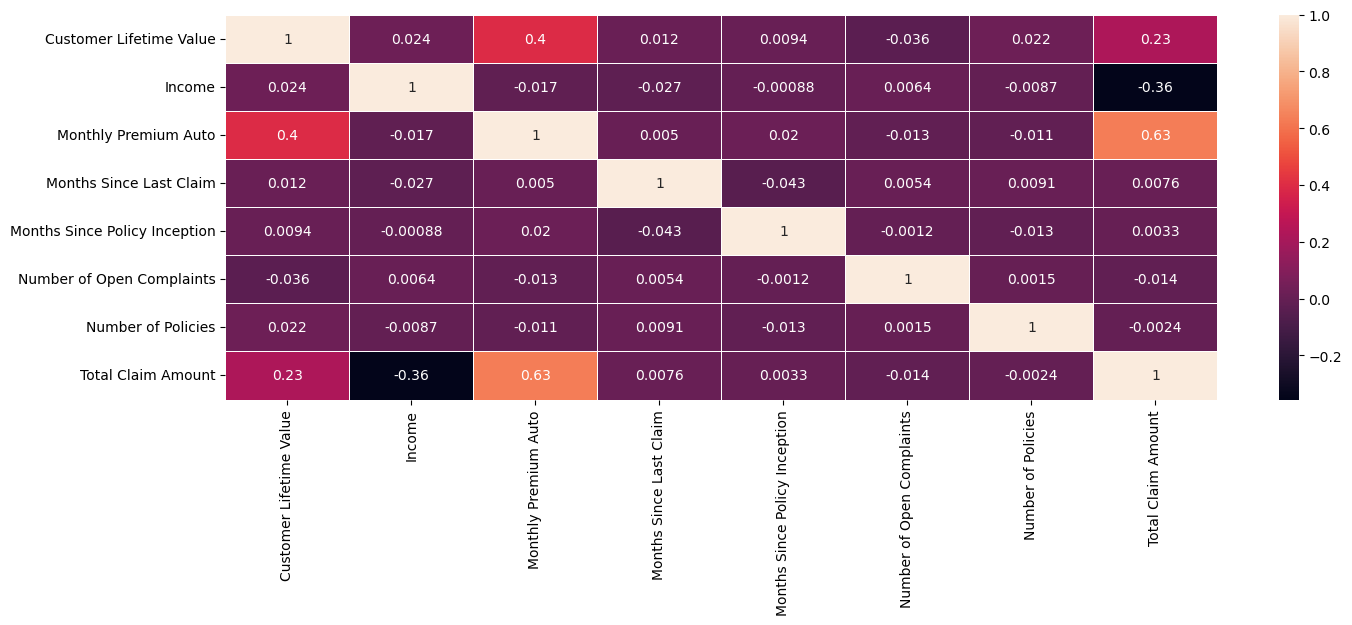

In [62]:
correlations_matrix2 = numerical2.corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix2, annot=True, linewidth = .5)
plt.show()

In [63]:
numerical2.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [64]:
numerical2 = numerical2.drop(["Months Since Policy Inception", "Number of Open Complaints"], axis = 1)

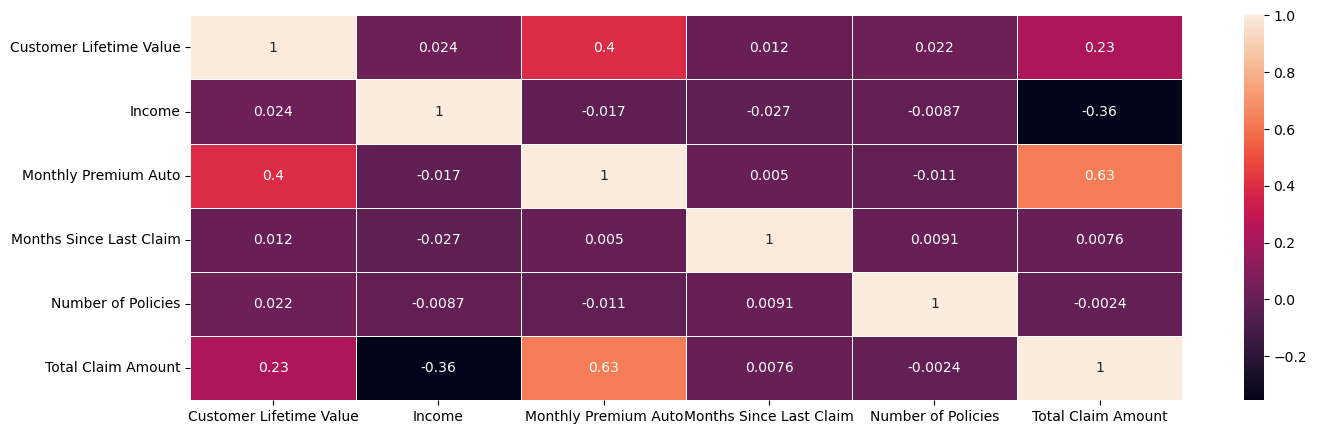

In [65]:
correlations_matrix2 = numerical2.corr()
# display(correlations_matrix)
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix2, annot=True, linewidth = .5)
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler
transformer2 = StandardScaler().fit(numerical2)
x_standardized2 = transformer2.transform(numerical2)
print(x_standardized2.shape)
x_standardized2 = pd.DataFrame(x_standardized2, columns=numerical2.columns)

(9134, 6)


In [67]:
encoder2 = OneHotEncoder().fit(categorical2)
print(encoder2.categories)
cat_encoded2 = encoder2.transform(categorical2).toarray()
print(cat_encoded2)
cols2 = encoder2.get_feature_names_out(input_features=categorical2.columns)
onehot_encoded2 = pd.DataFrame(cat_encoded2,columns=cols2)
onehot_encoded2.head(10)

auto
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


,Customer_AA10041,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,Customer_AA93585,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
X2 = pd.concat([x_standardized2, onehot_encoded2], axis=1)
X2.head(1)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Policies,Total Claim Amount,Customer_AA10041,Customer_AA11235,Customer_AA16582,Customer_AA30683,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,-0.762878,0.612827,-0.703925,1.678099,-0.822648,-0.16964,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# separating y and X to train and test the machine
y2 = X2["Total Claim Amount"]
X2 = X2.drop(["Total Claim Amount"], axis = 1)

In [ ]:
# making test data and train data from our predefined X-Matrix and y-column
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# preparing linear model function and make a mold from the training + test data
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train2,y_train2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time
import sys

train_list2 = []
r2_list2 = []
mse_list2 = []
rmse_list2 = []
mae_list2 = []
testsize2 = []
bigger2 = []

# calculating for different test_size values
for i in range(1,10,1):

    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=i/10, random_state=42)
    testsize2.append(i/10)

    # preparing linear model function and make a mold from the training + test data
    from sklearn import linear_model
    lm = linear_model.LinearRegression()
    lm.fit(X_train2,y_train2)

    # calculating R2 from training data
    predictions2 = lm.predict(X_train2)
    r2_train2 = r2_score(y_train2, predictions2)
    train_list2.append(r2_train2)

    # calculating R2 from test data
    predictions_test2 = lm.predict(X_test2)
    r2_2 = r2_score(y_test2, predictions_test2)
    r2_list2.append(r2_2)

    # calculating mean squared error (MSE)
    from sklearn.metrics import mean_squared_error
    mse2=mean_squared_error(y_test2,predictions_test2
    mse_list2.append(mse2)

    # calculating root mean squared error (RMSE)
    rmse2 np.sqrt(mean_squared_error(y_test2,predictions_test2))
    rmse_list2.append(rmse2)

    # calculating MAE 
    from sklearn.metrics import mean_absolute_error
    mae2 = mean_absolute_error(y_test2, predictions_test2)
    mae_list2.append(mae2)

    # bigger or smaller
    if r2_train2 < r2_2:
        bigger = "train < test"
    elif r2_train2 > r2_2:
        bigger = "train > test"
    else:
        bigger = "train = test"
    bigger2.append(bigger)


print("\nComparison of the R2_train 2 and R2_test 2 for different test sizes.")
compare1 = pd.DataFrame()
compare1["test_size"] = pd.DataFrame(testsize2)
compare1["r2_train"] = pd.DataFrame(train_list2)
compare1["r2_test"] = pd.DataFrame(r2_list2)
compare1["comparison"] = pd.DataFrame(bigger2)
display(compare2)

# displaying the metrics 
print("results")
metrics1 = pd.DataFrame()
metrics1["test_size"] = pd.DataFrame(testsize2)
metrics1["MSE"] = pd.DataFrame(mse_list2)
metrics1["RMSE"] = pd.DataFrame(rmse_list2)
metrics1["MAE"] = pd.DataFrame(mae_list2)
display(metrics2)
print("MSE: mean squared error\n MSE: root mean squared error\n MAE: mean absolute error")